# Data ETL Notebook as a Data Engineer:
Author: Yuxuan (Shauna) Hu

This notebook demonstrates individual understanding and knowledge towards Data Extract, Transform, Load (ETL) as a data engineer, showcasing personal abilities in the preparation, analysis, and visualization of datasets.

## 1 Parquet
First, we take the AIMS - MMP Inshore Water Quality Vertical Profiles Of Conductivity Temperature And Depth (CTD) dataset as an example for parquet formate datasets, which is accessed through [STAC](https://stac.reefdata.io/browser/collections/mmp/items/aims-mmp-inshore-wq-ctd). We firstly import necessary Python libraries.

In [1]:
# to access parquet file
import pandas as pd
import geopandas as gpd
import pyarrow.dataset as ds
import dask_geopandas

# to plot
from matplotlib import pyplot as plt

### 1.1 Connect the data from S3 address: `s3://gbr-dms-data-public/aims-mmp-inshore-wq-ctd/data.parquet`

In [2]:
uri = "s3://gbr-dms-data-public/aims-mmp-inshore-wq-ctd/data.parquet"
gdf = gpd.read_parquet(uri)

Sometimes, the dataset is large so it requires a relatively long time to read the parquet file. In this case, we can use `dask_geopands` which parallelly processes the dataset.

In [3]:
ddf = dask_geopandas.read_parquet(uri, storage_options = {"anon": True})
dask_gdf = ddf.compute()
dask_gdf.shape

(23444, 25)

### 1.2 Explore dataset by filters
We want to explore the dataset by filters, so we firstly print the field and head of this dataset to have a basic understanding of this dataset.

In [4]:
dask_gdf.columns
dask_gdf.head

<bound method NDFrame.head of                                                     file_id site_short_name  \
FID                                                                           
aims_mmp_ctd_profiles_data.fid-69bb3c22_19109f6...     5722           BUR13   
aims_mmp_ctd_profiles_data.fid-69bb3c22_19109f6...     5722           BUR13   
aims_mmp_ctd_profiles_data.fid-69bb3c22_19109f6...     5722           BUR13   
aims_mmp_ctd_profiles_data.fid-69bb3c22_19109f6...     5722           BUR13   
aims_mmp_ctd_profiles_data.fid-69bb3c22_19109f6...     5722           BUR13   
...                                                     ...             ...   
aims_mmp_ctd_profiles_data.fid-69bb3c22_19109f6...     7328            TUL3   
aims_mmp_ctd_profiles_data.fid-69bb3c22_19109f6...     7328            TUL3   
aims_mmp_ctd_profiles_data.fid-69bb3c22_19109f6...     7328            TUL3   
aims_mmp_ctd_profiles_data.fid-69bb3c22_19109f6...     7328            TUL3   
aims_mmp_ctd_profiles_

Let's filter this dataset by site, in which is identified by `site_short_name` in this case.

In [5]:
site = 'RM10'
dask_gdf = dask_gdf[dask_gdf["site_short_name"] == site]
dask_gdf

,file_id,site_short_name,station,cruise_id,time_coverage_start,time_coverage_end,TIME,DIRECTION,LATITUDE,LONGITUDE,...,TEMP,PSAL,TURB,N_BIN,CPHL,DOX2,PAR,CNDC,SBE_FLAG,geometry
FID,,,,,,,,,,,,,,,,,,,,,
aims_mmp_ctd_profiles_data.fid-69bb3c22_19109f6371b_-2055,5755,RM10,WQQ503,7701.0,2022-02-10 23:57:45,2022-02-10 23:57:45,2022-02-10 23:57:45,D,-17.2025,145.9802,...,29.9220,33.3909,NaN,4,0.0951,189.581,1978.200,5.5889,0,POINT (145.98017 -17.20250)
aims_mmp_ctd_profiles_data.fid-69bb3c22_19109f6371b_-2054,5755,RM10,WQQ503,7701.0,2022-02-10 23:57:45,2022-02-10 23:57:45,2022-02-10 23:57:45,D,-17.2025,145.9802,...,29.8476,33.4753,NaN,10,0.1071,188.501,886.030,5.5939,0,POINT (145.98017 -17.20250)
aims_mmp_ctd_profiles_data.fid-69bb3c22_19109f6371b_-2053,5755,RM10,WQQ503,7701.0,2022-02-10 23:57:45,2022-02-10 23:57:45,2022-02-10 23:57:45,D,-17.2025,145.9802,...,29.7791,33.5503,NaN,10,0.0974,188.533,1112.700,5.5980,0,POINT (145.98017 -17.20250)
aims_mmp_ctd_profiles_data.fid-69bb3c22_19109f6371b_-2052,5755,RM10,WQQ503,7701.0,2022-02-10 23:57:45,2022-02-10 23:57:45,2022-02-10 23:57:45,D,-17.2025,145.9802,...,29.7285,33.5750,NaN,10,0.1187,187.488,853.880,5.5965,0,POINT (145.98017 -17.20250)
aims_mmp_ctd_profiles_data.fid-69bb3c22_19109f6371b_-2051,5755,RM10,WQQ503,7701.0,2022-02-10 23:57:45,2022-02-10 23:57:45,2022-02-10 23:57:45,D,-17.2025,145.9802,...,29.6659,33.6144,NaN,10,0.1468,185.701,680.700,5.5959,0,POINT (145.98017 -17.20250)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
aims_mmp_ctd_profiles_data.fid-69bb3c22_19109f6371b_3835,7303,RM10,WQQ430,7658.0,2021-10-01 23:35:32,2021-10-01 23:35:32,2021-10-01 23:35:32,D,-17.2032,145.9807,...,24.8180,35.0382,NaN,9,0.4638,215.796,134.660,5.2935,0,POINT (145.98067 -17.20317)
aims_mmp_ctd_profiles_data.fid-69bb3c22_19109f6371b_38fe,7318,RM10,WQQ447,7784.0,2021-12-08 22:27:36,2021-12-08 22:27:36,2021-12-08 22:27:36,D,-17.2032,145.9789,...,29.9436,34.7247,NaN,15,0.4721,182.202,487.040,5.7891,0,POINT (145.97895 -17.20317)
aims_mmp_ctd_profiles_data.fid-69bb3c22_19109f6371b_38ff,7318,RM10,WQQ447,7784.0,2021-12-08 22:27:36,2021-12-08 22:27:36,2021-12-08 22:27:36,D,-17.2032,145.9789,...,29.9204,34.7399,NaN,15,0.5531,181.349,271.260,5.7889,0,POINT (145.97895 -17.20317)


Then we try to filter this subdataset by time, given the range of time.

In [6]:
dask_gdf['TIME'] = pd.to_datetime(dask_gdf['TIME'])
start = '2021-01-01'
end = '2021-12-31'
filtered = dask_gdf[(dask_gdf['TIME'] >= start) & (dask_gdf['TIME'] < end)]
filtered

c:\Users\yhu12\AppData\Local\Programs\Python\Python311\Lib\site-packages\geopandas\geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,file_id,site_short_name,station,cruise_id,time_coverage_start,time_coverage_end,TIME,DIRECTION,LATITUDE,LONGITUDE,...,TEMP,PSAL,TURB,N_BIN,CPHL,DOX2,PAR,CNDC,SBE_FLAG,geometry
FID,,,,,,,,,,,,,,,,,,,,,
aims_mmp_ctd_profiles_data.fid-69bb3c22_19109f6371b_3418,7220,RM10,WQQ304,7527.0,2021-02-13 04:09:01,2021-02-13 04:09:01,2021-02-13 04:09:01,D,-17.2017,145.9900,...,30.6298,31.1842,NaN,8,0.2973,148.426,295.280,5.3277,0,POINT (145.99000 -17.20167)
aims_mmp_ctd_profiles_data.fid-69bb3c22_19109f6371b_3419,7220,RM10,WQQ304,7527.0,2021-02-13 04:09:01,2021-02-13 04:09:01,2021-02-13 04:09:01,D,-17.2017,145.9900,...,30.3379,32.2452,NaN,14,0.2049,130.513,200.760,5.4594,0,POINT (145.99000 -17.20167)
aims_mmp_ctd_profiles_data.fid-69bb3c22_19109f6371b_341a,7220,RM10,WQQ304,7527.0,2021-02-13 04:09:01,2021-02-13 04:09:01,2021-02-13 04:09:01,D,-17.2017,145.9900,...,30.1422,32.7385,NaN,14,0.1790,117.823,147.930,5.5140,0,POINT (145.99000 -17.20167)
aims_mmp_ctd_profiles_data.fid-69bb3c22_19109f6371b_341b,7220,RM10,WQQ304,7527.0,2021-02-13 04:09:01,2021-02-13 04:09:01,2021-02-13 04:09:01,D,-17.2017,145.9900,...,30.0806,32.8671,NaN,14,0.1746,120.200,122.250,5.5271,0,POINT (145.99000 -17.20167)
aims_mmp_ctd_profiles_data.fid-69bb3c22_19109f6371b_341c,7220,RM10,WQQ304,7527.0,2021-02-13 04:09:01,2021-02-13 04:09:01,2021-02-13 04:09:01,D,-17.2017,145.9900,...,30.0347,33.0982,NaN,14,0.2078,126.446,102.370,5.5570,0,POINT (145.99000 -17.20167)
aims_mmp_ctd_profiles_data.fid-69bb3c22_19109f6371b_341d,7220,RM10,WQQ304,7527.0,2021-02-13 04:09:01,2021-02-13 04:09:01,2021-02-13 04:09:01,D,-17.2017,145.9900,...,29.9554,33.2190,NaN,14,0.2290,126.836,87.296,5.5670,0,POINT (145.99000 -17.20167)
aims_mmp_ctd_profiles_data.fid-69bb3c22_19109f6371b_341e,7220,RM10,WQQ304,7527.0,2021-02-13 04:09:01,2021-02-13 04:09:01,2021-02-13 04:09:01,D,-17.2017,145.9900,...,29.8806,33.2733,NaN,7,0.2737,121.309,76.165,5.5675,0,POINT (145.99000 -17.20167)
aims_mmp_ctd_profiles_data.fid-69bb3c22_19109f6371b_341f,7220,RM10,WQQ304,7527.0,2021-02-13 04:09:01,2021-02-13 04:09:01,2021-02-13 04:09:01,D,-17.2017,145.9900,...,29.8226,33.4500,NaN,9,0.6908,125.224,61.550,5.5878,0,POINT (145.99000 -17.20167)
aims_mmp_ctd_profiles_data.fid-69bb3c22_19109f6371b_34ee,7237,RM10,WQQ321,7603.0,2021-04-06 22:03:26,2021-04-06 22:03:26,2021-04-06 22:03:26,D,-17.2029,145.9788,...,27.7831,32.2070,NaN,8,0.2772,195.091,0.031,5.2006,0,POINT (145.97885 -17.20285)


### 1.3 Investigate metadata

In [7]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Sometimes, the CRS is not correctly set. For example, on the metadata page, the CRS of the dataset is listed as `EPSG:4283`, while the metadata from the parquet file shows `EPSG:4326`. This discrepancy could occur if the dataset's CRS was not correctly configured during transfer. In this case, we want to reset the correct CRS for this parquet file through re-projection.

In [8]:
new_gdf = gdf.to_crs(4283)
print("Updated CRS:", new_gdf.crs)

Updated CRS: EPSG:4283


To explore the schema of this dataset, we use `pyarrow.dataset` to load this parquet file.

In [9]:
dataset = ds.dataset(uri)
dataset.schema

file_id: int64
site_short_name: string
station: string
cruise_id: double
time_coverage_start: timestamp[ns]
time_coverage_end: timestamp[ns]
TIME: timestamp[ns]
DIRECTION: string
LATITUDE: double
LONGITUDE: double
DEPTH: int64
BOT_DEPTH: double
BOAT_SHADOW: double
PRES_REL: double
BAT_PERCENT: double
TEMP: double
PSAL: double
TURB: double
N_BIN: int64
CPHL: double
DOX2: double
PAR: double
CNDC: double
SBE_FLAG: int64
geometry: binary
FID: string
-- schema metadata --
pandas: '{"index_columns": ["FID"], "column_indexes": [{"name": null, "fi' + 3224
geo: '{"primary_column": "geometry", "columns": {"geometry": {"encoding":' + 1322

### 1.4. Visualisation

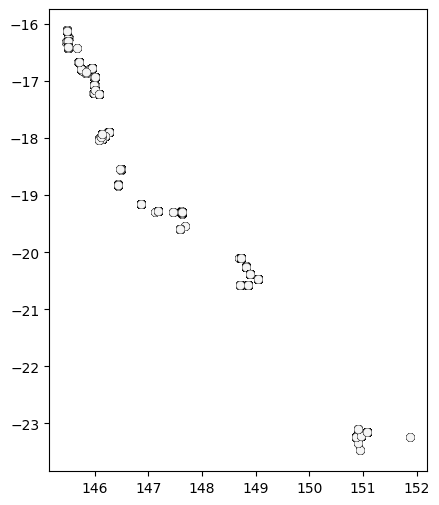

In [10]:
gdf.plot(figsize=(10, 6), color='whitesmoke', edgecolor='black', linewidth=0.2)
plt.show()

We can use `contextily` to add base map

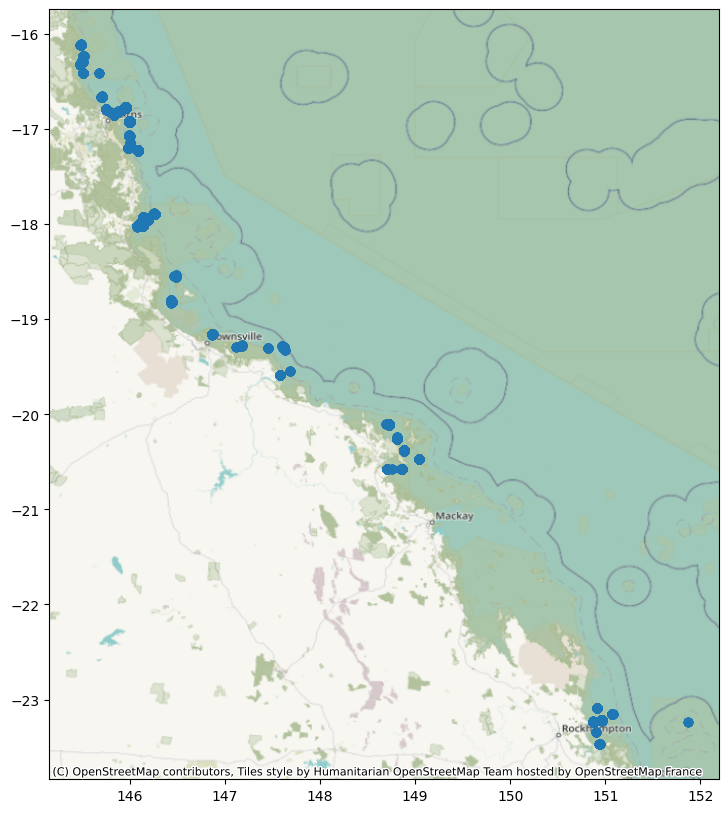

In [11]:
import contextily as ctx
gdf.to_crs(epsg=4326)
ax = gdf.plot(figsize=(10, 10))
ctx.add_basemap(ax, crs=gdf.crs.to_string())

plt.show()

Focus on the filtered dataset, we can plot temporature by time.

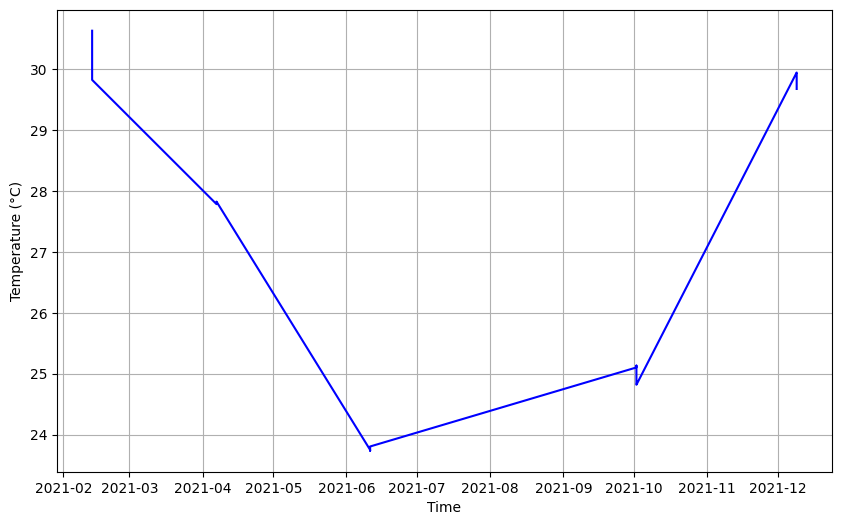

In [12]:

plt.figure(figsize=(10, 6))
plt.plot(filtered['TIME'], filtered['TEMP'], label='Temperature', color='blue')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()


## 2 Zarr

Then, we take the IMOS - SRS - MODIS - 01 day - Chlorophyll-a concentration (GSM model) dataset as an example for Zarr format datasets, which is accessed through [STAC](https://stac.reefdata.io/browser/collections/imos-satellite-remote-sensing/items/imos-srs-aqua-oc-chla-gsm). We firstly import necessary Python libraries.

In [13]:
import xarray as xr
import s3fs 

We use the S3 path provided on STAC to access the Zarr file: `s3://gbr-dms-data-public/imos-srs-aqua-oc-chla-gsm/data.zarr`

In [14]:
zarr_path = "s3://gbr-dms-data-public/imos-srs-aqua-oc-chla-gsm/data.zarr"

fs = s3fs.S3FileSystem(anon=True)
data = xr.open_zarr(zarr_path, consolidated=True, storage_options={"anon": True})
data

<xarray.Dataset> Size: 86GB
Dimensions:    (time: 7918, latitude: 1599, longitude: 1699)
Coordinates:
  * latitude   (latitude) float64 13kB -9.5 -9.51 -9.52 ... -25.46 -25.47 -25.48
  * longitude  (longitude) float64 14kB 142.0 142.0 142.0 ... 158.9 159.0 159.0
  * time       (time) datetime64[ns] 63kB 2002-07-04T05:30:00 ... 2024-08-13T...
Data variables:
    chl_gsm    (time, latitude, longitude) float32 86GB dask.array<chunksize=(30, 400, 340), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      File initialised at 2024-08-15T06:21:10.460900\nInitialised...
    source_path:  imos-srs/archive/oc/aqua/v202302/1d/2024/08/A20240813.L2OC_...

We can validate the Zarr dataset by ploting time to see if it is monotonic.

['2002-07-04T05:30:00.000000000' '2002-07-05T05:30:00.000000000'
 '2002-07-06T05:30:00.000000000' ... '2024-08-11T05:30:00.000000000'
 '2024-08-12T05:30:00.000000000' '2024-08-13T05:30:00.000000000']


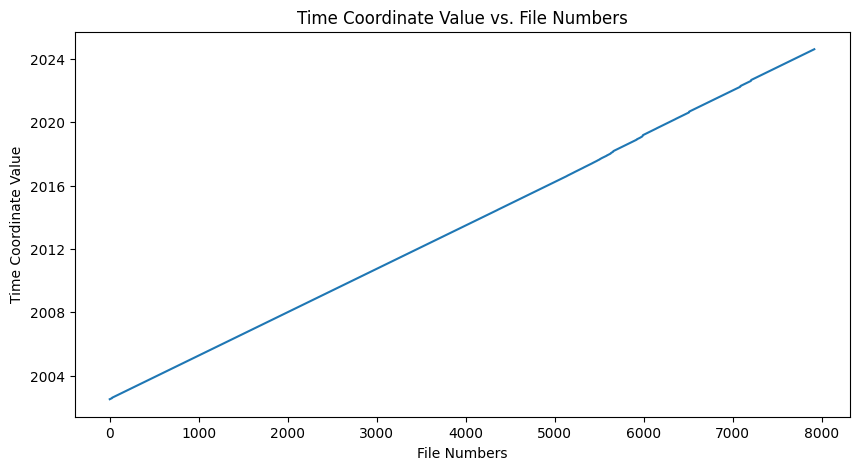

In [15]:
time_values = data['time'].values
file_numbers = range(len(time_values))
print(time_values)
plt.figure(figsize=(10, 5))
plt.plot(file_numbers, time_values)
plt.xlabel('File Numbers')
plt.ylabel('Time Coordinate Value')
plt.title('Time Coordinate Value vs. File Numbers')
plt.show()

Selecting the most recent file, we can plot each variable.

chl_gsm


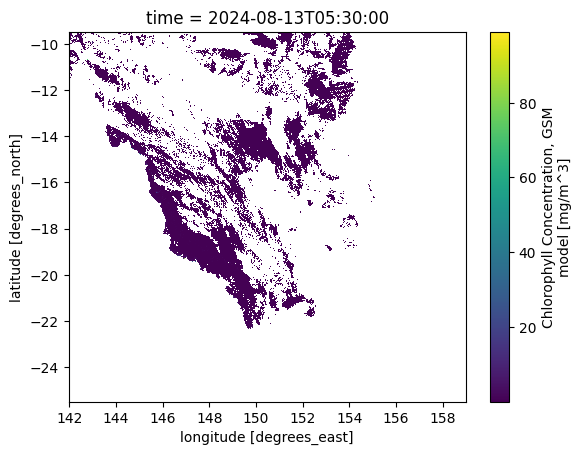

In [16]:
# plot every varaible in the dataset
for var in data.data_vars:
    print(var)
    try:
        data[var].isel(time=-1).plot()
        plt.show()
    except:
        print(f"Could not plot {var}")
        continue

We can also slice the data within a particular temporal range, i.e., 2023.

In [17]:
data_2023 = data.sel(time="2023")
data_2023

<xarray.Dataset> Size: 4GB
Dimensions:    (time: 365, latitude: 1599, longitude: 1699)
Coordinates:
  * latitude   (latitude) float64 13kB -9.5 -9.51 -9.52 ... -25.46 -25.47 -25.48
  * longitude  (longitude) float64 14kB 142.0 142.0 142.0 ... 158.9 159.0 159.0
  * time       (time) datetime64[ns] 3kB 2023-01-01T05:30:00 ... 2023-12-31T0...
Data variables:
    chl_gsm    (time, latitude, longitude) float32 4GB dask.array<chunksize=(22, 400, 340), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      File initialised at 2024-08-15T06:21:10.460900\nInitialised...
    source_path:  imos-srs/archive/oc/aqua/v202302/1d/2024/08/A20240813.L2OC_...

And group it by month.

In [18]:
data_monthly_2023 = data_2023.groupby("time.month").mean()
data_monthly_2023

<xarray.Dataset> Size: 130MB
Dimensions:    (month: 12, latitude: 1599, longitude: 1699)
Coordinates:
  * latitude   (latitude) float64 13kB -9.5 -9.51 -9.52 ... -25.46 -25.47 -25.48
  * longitude  (longitude) float64 14kB 142.0 142.0 142.0 ... 158.9 159.0 159.0
  * month      (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    chl_gsm    (month, latitude, longitude) float32 130MB dask.array<chunksize=(1, 400, 340), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      File initialised at 2024-08-15T06:21:10.460900\nInitialised...
    source_path:  imos-srs/archive/oc/aqua/v202302/1d/2024/08/A20240813.L2OC_...